An attempt to test the functions of the pandas library.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy  as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
import re
import sklearn
import math

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from pandas import DataFrame , read_csv

import seaborn as sns

%pylab inline

%matplotlib inline

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))


for f in os.listdir('../input'):
    print (f.ljust(30)+ str(round(os.path.getsize('../input/' + f), 2)) + ' Byte')

# Any results you write to the current directory are saved as output.

Populating the interactive namespace from numpy and matplotlib
th.csv                        138305 Byte


In [3]:
# Getting Data from CSV files
#Reading the csv file into a dataframe
df = pd.read_csv('../input/th.csv')
df.head(100)

,arveres_id,tetel_tulajdoni_hanyad
0,308084,1/6
1,308085,1/1
2,308087,2/2
3,308625,1/2+1/2 (összesen: 2
4,309448,1/1
5,309596,1/1
6,309658,1/1
7,309707,1/1
8,309793,1/1
9,310725,1/1


In [4]:
# a 11. sortól értékes df
df.info()

print(40*'_')

df[11:].info()
# Few of the Points from the summary include 
#  1. The dataframe has 2 columns 
#  2. The 0-10 rows replay from 11-th row 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 2 columns):
arveres_id                10044 non-null object
tetel_tulajdoni_hanyad    10044 non-null object
dtypes: object(2)
memory usage: 157.0+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10033 entries, 11 to 10043
Data columns (total 2 columns):
arveres_id                10033 non-null object
tetel_tulajdoni_hanyad    10033 non-null object
dtypes: object(2)
memory usage: 156.8+ KB


# "Hátulról darabolós" kiértékelés
A "tetel_tulajdoni_hanyad" stringjeit hátulról egyenként rövidítve addig daraboljuk, amíg 
az eval() int, vagy float értéket ad vissza. Addigra már levágtuk a betűket, a ()/-+... jeleket, mert általában az eleje 
használható. De a végéről közelítünk.

Ha így nem sikerül, akkor még megnézzük, hogy szerepel-e benne 1/1. Valahogy meg kellene különböztetni,hogy 1/1 # 1/100, ...






In [5]:
# 1. funcion: eval() "tetel_tulajdoni_hanyad") hátulról darabolós kiértékelés kiértékelhetőségig
#    ha sikerül, akkor !=0 értéket ad vissza, egyébként None

#betűk, írásjelek kitakarítása
abc    ='aábcdeéfghiíjklmnoóöőpqrstuúüűxyvz'
punct  ='.?!:*_'
#1. A zárójelek kitakarítása szomszédos szám összevonási problémákat okozhat.
#2. A szóközök benthagyása megtartja a tagoltságot és megakadályozza a nemkívánatos szomszédos szám összevonódásokat.
#   Az eval pedig érzéketlen a szóközökre, így még jó is a tagolás megtartása. 


def th_replace(tth_replace):
    '''
    String tisztítása a szükségtelen jelektől
    Attention! String Replace makes a copy.
    '''
    #replace '-' to '+', ill. ',' to '+' a rögzítési szokás megfigyelés alapján
    #néha a résztulajdonokat kötőjelekkel, vagy vesszővel tagoltan sorolják fel
    th_cleared=tth_replace.strip().replace('-','+').replace(',',' ')
    #th_cleared=tth_replace.strip().replace('-','+').replace(',','+')

    #betűk, írásjelek kitakarítása
    for p in abc + abc.upper()+punct:
        if th_cleared.count(p)>=1:
            
            #String Replace makes a copy
            th_cleared=th_cleared.replace(p,'')
    
            #print(th_cleared, p)
        
    return th_cleared.strip()


def eval_th_more(teval_th_more):
    '''
    1/1-es kiértékelő function
    '''
    #eval_th_more_replaced=teval_th_more

    eval_th_more_replaced=th_replace(teval_th_more)    
    eval_th_more_value   =None

    #egyre csökkenő hosszúságú sztring kiértékelése
    for x in range(len(eval_th_more_replaced),0,-1):
        #print(eval_th_more_replaced[0:x])
        try:
            #eval próba
            eval_th_more_value_01=eval(eval_th_more_replaced[0:x])

            if isinstance(eval_th_more_value_01, (int, float)):
                #int/float az eredmény kötőjel miatt néha negatív lesz, ezért abs()
                #bár a - jelet + jelre cseréltük már
                
                eval_th_more_value=abs(eval_th_more_value_01)

                break
                #pass

            else:
                #ha a kiértékelés eredménye True/False (pl. 1/4+1/4=1/2 is kiértékelhető)
                #folytassuk tovább

                continue
                #pass

        except:
            #ha hiba van, akkor folytassuk
            
            continue
            #pass

    # ha nem sikerült kiértékelni, vagy értéke > 1, de van benne 1/1, akkor = 1.0    
    if eval_th_more_value is None:
        if eval_th_more_replaced.count('1/1')>=1:
            #ha '1/1' string szerepel benne, akkor OK
            eval_th_more_value=1.0
            
    elif eval_th_more_value > 1:
        #valszeg hibás rögzítések    
        if eval_th_more_replaced.count('1/1')>=1:
            #ha '1/1' string szerepel benne, akkor OK
            eval_th_more_value=1.0
   
            
    #print(eval_th_more_value)
        
    return eval_th_more_value 



In [6]:
# 2.1 új feature értékadás: nem kívánatos jelek leírtása
df['th_cleared'] = df['tetel_tulajdoni_hanyad'].apply(th_replace)

In [7]:
# 2.2 új feature értékadás: a kiértékelés eredménye
df['eval_th'] = df['tetel_tulajdoni_hanyad'].apply(eval_th_more)

In [8]:
# 3. új feature: a 'tisztított'  'tetel_tulajdoni_hanyad' számára (hogy lássuk is)
#df['th_cleared'] = ''
df.head(100)

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th
0,308084,1/6,1/6,0.166667
1,308085,1/1,1/1,1.000000
2,308087,2/2,2/2,1.000000
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,1.000000
4,309448,1/1,1/1,1.000000
5,309596,1/1,1/1,1.000000
6,309658,1/1,1/1,1.000000
7,309707,1/1,1/1,1.000000
8,309793,1/1,1/1,1.000000
9,310725,1/1,1/1,1.000000


In [9]:
#valószínűleg hibás rögzítések
#hibásan rögzített törtek
#ESETLEG a "tetel_tulajdoni_hanyad" eredetileg rövíd hossz, így a végét nem rögzítették,
#        vagy az átvételkor elégtelen mezőhossz definíció miatt levágtad a végét

df[df['eval_th']>1]

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th
177,317864,1/6 + 3/6 + 1/6 + 1/,1/6 + 3/6 + 1/6 + 1/,1.833333
1424,323922,11/52-11/52-15/52-15,11/52+11/52+15/52+15,15.711538
2336,326174,30/60+25/60+1/60+1/6,30/60+25/60+1/60+1/6,1.100000
2834,327351,1/4+24+1/4,1/4+24+1/4,24.500000
4358,330950,20/96+19/96+19/96+19,20/96+19/96+19/96+19,19.604167
4367,330976,1/8 + 4/8 + 1/8 + 1/,1/8 + 4/8 + 1/8 + 1/,1.750000
5647,333416,1/6 + 3/6 + 1/6 + 1/,1/6 + 3/6 + 1/6 + 1/,1.833333
5888,333848,2/4-ed + 1/4-ed + 1/,2/4+ + 1/4+ + 1/,1.750000
6172,334329,3/6 + 1/6 + 1/6 + 1/,3/6 + 1/6 + 1/6 + 1/,1.833333
7054,335930,481/534+27/534+26/53,481/534+27/534+26/53,1.441877


In [10]:
df[df['tetel_tulajdoni_hanyad'].str.contains(',')]

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th
514,321111,"1/1, 245/511",1/1 245/511,1.000000
1640,324497,"1/1 (II/5.,6.)",1/1 (/5 6),1.000000
2578,326769,"1/2+1/2, összevont 1",1/2+1/2 1,1.000000
2610,326854,"1/4, 1/4",1/4 1/4,0.250000
3216,328261,"3/8 (II/12,13)",3/8 (/12 13),0.375000
3359,328678,"10/60 (II/8.,14)",10/60 (/8 14),0.166667
4875,331994,"1/2 (II/29,30.)",1/2 (/29 30),0.500000
5631,333385,"18/24, 3/24, 3/24",18/24 3/24 3/24,0.750000
7207,336382,"1/1 (II/8,9)",1/1 (/8 9),1.000000
8286,339031,"5/20, 5/20",5/20 5/20,0.250000


In [11]:
#  the head function of the pandas dataframe prints out the first few rows of the dataset
df.head(1000)


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th
0,308084,1/6,1/6,0.166667
1,308085,1/1,1/1,1.000000
2,308087,2/2,2/2,1.000000
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,1.000000
4,309448,1/1,1/1,1.000000
5,309596,1/1,1/1,1.000000
6,309658,1/1,1/1,1.000000
7,309707,1/1,1/1,1.000000
8,309793,1/1,1/1,1.000000
9,310725,1/1,1/1,1.000000


In [12]:
#kiértékelhetetlen sorok
#df[math.isnan(df['eval_th'])]
#df[None is df['eval_th']]
#df[df['eval_th'] is None]
#df[df['eval_th'] is Null]
#df[df['eval_th'] is NaN]

df[df['eval_th'].isnull()]


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th
10,arveres_id,tetel_tulajdoni_hanyad,,NaN
129,316714,adós,,NaN
972,322817,-,+,NaN
3258,328417,-,+,NaN
9992,345156,TESZT,,NaN
9993,345161,TESZT,,NaN


In [13]:
df[df['eval_th'].isnull()].describe()


,eval_th
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [14]:
df[df['eval_th'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 10 to 9993
Data columns (total 4 columns):
arveres_id                6 non-null object
tetel_tulajdoni_hanyad    6 non-null object
th_cleared                6 non-null object
eval_th                   0 non-null float64
dtypes: float64(1), object(3)
memory usage: 240.0+ bytes


In [15]:
#valószínűleg hibás rögzítések
df[df['eval_th']>0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10038 entries, 0 to 10043
Data columns (total 4 columns):
arveres_id                10038 non-null object
tetel_tulajdoni_hanyad    10038 non-null object
th_cleared                10038 non-null object
eval_th                   10038 non-null float64
dtypes: float64(1), object(3)
memory usage: 392.1+ KB


In [16]:
#valószínűleg hibás rögzítések
df[df['eval_th']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6570 entries, 1 to 10043
Data columns (total 4 columns):
arveres_id                6570 non-null object
tetel_tulajdoni_hanyad    6570 non-null object
th_cleared                6570 non-null object
eval_th                   6570 non-null float64
dtypes: float64(1), object(3)
memory usage: 256.6+ KB


In [17]:
df['eval_th'].unique()

array([  1.66666667e-01,   1.00000000e+00,              nan,
         5.00000000e-01,   2.50000000e-01,   1.42857143e-01,
         2.72727273e-01,   3.57142857e-02,   9.00000000e-01,
         3.75000000e-01,   7.00000000e-01,   6.66666667e-01,
         7.07930368e-01,   2.00000000e-01,   4.40487348e-02,
         1.83333333e+00,   3.33333333e-01,   7.08333333e-01,
         1.00000000e-01,   5.00098251e-01,   4.76190476e-02,
         2.10000000e-01,   8.33333333e-02,   2.64445755e-01,
         7.50000000e-01,   6.00000000e-01,   4.00000000e-01,
         1.00000000e+00,   4.64285714e-01,   1.25000000e-01,
         3.24155194e-01,   1.38029112e-02,   5.29010239e-02,
         4.60800000e-01,   2.81250000e-01,   7.25000000e-01,
         5.50000000e-02,   8.79166667e-01,   1.38339921e-02,
         1.46533974e-01,   4.44444444e-01,   5.55555556e-02,
         3.88888889e-01,   2.77777778e-02,   7.81250000e-03,
         3.24098036e-01,   6.25000000e-02,   1.81490000e-01,
         3.09523810e-01,

In [18]:
len(df['eval_th'].unique())

320

In [19]:
# df['eval_th'].fillna(df['tetel_tulajdoni_hanyad'].apply(eval_th_more))

In [20]:
df[df['eval_th'].isnull()]


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th
10,arveres_id,tetel_tulajdoni_hanyad,,NaN
129,316714,adós,,NaN
972,322817,-,+,NaN
3258,328417,-,+,NaN
9992,345156,TESZT,,NaN
9993,345161,TESZT,,NaN


In [21]:
# új feature 1/1 jellemzőre

#df['th_tiszta'] = df["eval_th"].apply(lambda x: df["tetel_tulajdoni_hanyad"] if x == 1 else '')

#df.loc[df['eval_th'] == 0, 'th_tisztitando'] = df["tetel_tulajdoni_hanyad"]

#df.loc[df['eval_th'] != 0, 'th_tiszta'] = df["tetel_tulajdoni_hanyad"]



#néhány 1-nél nagyobb, lehet, hogy jó lenne még 1/1-nek, de további kiértékelés kellene
df['th_1_per_1'] = df["eval_th"].apply(lambda x: 1 if x == 1 else 0)

df.head(100)


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th,th_1_per_1
0,308084,1/6,1/6,0.166667,0
1,308085,1/1,1/1,1.000000,1
2,308087,2/2,2/2,1.000000,1
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,1.000000,1
4,309448,1/1,1/1,1.000000,1
5,309596,1/1,1/1,1.000000,1
6,309658,1/1,1/1,1.000000,1
7,309707,1/1,1/1,1.000000,1
8,309793,1/1,1/1,1.000000,1
9,310725,1/1,1/1,1.000000,1


In [22]:
#valószínűleg hibás rögzítések
df[df['th_1_per_1']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6570 entries, 1 to 10043
Data columns (total 5 columns):
arveres_id                6570 non-null object
tetel_tulajdoni_hanyad    6570 non-null object
th_cleared                6570 non-null object
eval_th                   6570 non-null float64
th_1_per_1                6570 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 308.0+ KB


In [23]:
#valószínűleg hibás rögzítések
df[df['th_1_per_1']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3474 entries, 0 to 10039
Data columns (total 5 columns):
arveres_id                3474 non-null object
tetel_tulajdoni_hanyad    3474 non-null object
th_cleared                3474 non-null object
eval_th                   3468 non-null float64
th_1_per_1                3474 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 162.8+ KB


In [24]:
#valószínűleg hibás rögzítések
df[df['th_1_per_1'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
arveres_id                0 non-null object
tetel_tulajdoni_hanyad    0 non-null object
th_cleared                0 non-null object
eval_th                   0 non-null float64
th_1_per_1                0 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 0.0+ bytes


In [25]:
df['th_1_per_1'].unique()


array([0, 1], dtype=int64)

In [26]:
# Testing the function value counts
df['th_1_per_1'].value_counts()

1    6570
0    3474
Name: th_1_per_1, dtype: int64

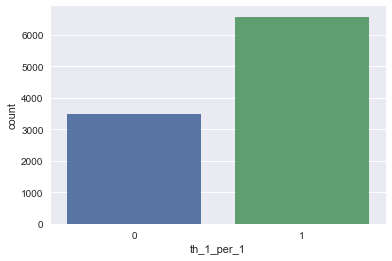

In [27]:
#sns.countplot(df['th_1_per_1'])
sns.countplot(df.th_1_per_1)


In [28]:
pd.tools.plotting.radviz(df, 'eval_th')


TypeError: ("unsupported operand type(s) for -: 'str' and 'str'", 'occurred at index arveres_id')

In [35]:
df[11:][['arveres_id','th_1_per_1']]

,arveres_id,th_1_per_1
11,308084,0
12,308085,1
13,308087,1
14,308625,1
15,309448,1
16,309596,1
17,309658,1
18,309707,1
19,309793,1
20,310725,1


In [36]:
submission = pd.DataFrame({
        "arveres_id": df[11:]["arveres_id"],
        "th_1_per_1": df[11:]["th_1_per_1"]
    })
submission.to_csv('th_ok.csv', index=False)



# Tanulmány kódok



In [ ]:
print(eval('1/2+1/2'))
print(eval('95/100+5/100==1/1'))
print(eval('94/100+5/100==1/1'))

In [ ]:
print([ord('0'), ord('1')])
print(type(ord('1')))
print(isinstance(ord('1'),int))
print(isinstance('1',int))
print(type(eval('1/2+1/2')))

isinstance(eval('1/2+1/2'),float)

In [ ]:
str='012345abc -'
print(str[4].isdigit())

In [ ]:
str='012345abc -'
str is None

In [ ]:
#tanulmány a hátulról vagdosva haladós kiértékeléshez

a="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből"
print(len(a))
a[0:len(a)-1]
[x for x in range(len(a),0,-1)]
b=a.strip(' ')
#print(a, b)
for x in range(len(b),0,-1):
    #print(b[0:x])
    try:
        #ha '1/1' string szerepel benne, akkor eleve OK-nak vesszük
        eval_th_value_01=eval(b[0:x])

        if isinstance(eval_th_value_01, (int, float)):
            #int/float az eredmény kötőjel miatt néha negatív lesz, ezért abs()
            print([b[0:x],abs(eval_th_value_01)])
            #print(abs(eval_th_value_01))
            break

        else:
            #ha a kiértékelés eredménye True/False (pl. 1/4+1/4=1/2 is kiértékelhető)
            print([b[0:x],abs(eval_th_value_01)])

            pass

    except:
        #num_eval_th=0
        print([b[0:x],"Nem OK"])
        pass

    


In [ ]:
a="1 / 3 - 1/ 3 = 2/3 (mi lesz ebből"
list(a)
a.strip()
a.lstrip()
a.split()
a.replace(' ','').replace('-','+')
#a.replace(' -','-')
#a.replace([' ','-'],['','+'])
list(a)



In [ ]:
a="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből"
a.split(' ')

In [ ]:
from string import punctuation
print(punctuation)


In [ ]:
tweet="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből"
tweet_processed=tweet.lower()
for p in list(punctuation):
    tweet_processed=tweet_processed.replace(p,'')
print(tweet_processed)    

In [ ]:
a='1/2+1/2 (összesen: 2*+-'
print(th_replace(a))

In [ ]:
import urllib
'''
url='http://www.unc.edu/~ncaren/haphazard/negative.txt'
file_name='negative.txt'
urllib.urlretrieve(url,file_name)

urllib.urlretrieve('http://www.unc.edu/~ncaren/haphazard/negative.txt','negative.txt')
'''
files=['negative.txt','positive.txt','obama_tweets.txt']
path='http://www.unc.edu/~ncaren/haphazard/'
for file_name in files:
    urllib.request.urlopen(path+file_name,file_name)


In [ ]:
tweets = open("obama_tweets.txt").read()
tweets_list = tweets.split('\n')
len(tweets_list)

for tweet in tweets_list[0:5]:
    print(tweet)



# Tanulmány kódok vége



# További próbálkozások, tanulmányok

In [ ]:
# sorting the data acording to highest satisfaction level
sort = df[11:].sort_values(['tetel_tulajdoni_hanyad'], ascending = False)
sort.head(20)

In [ ]:
# printing the employee number with the hughest average monthly hours
sort = df.sort_values(['tetel_tulajdoni_hanyad'] , ascending = True)
sort.head(100)

In [ ]:
df['th_1_per_1'].sum(axis=0)

In [ ]:
df.describe()
#df.count()
#pd.value_counts()


In [ ]:
# Method 2: To simply print out the maximum value of eval_th by simply 
# accessing the column in the dataset

[df['eval_th'].min(), df['eval_th'].max()]

In [ ]:
# To print the tetel_tulajdoni_hanyad associated with the highest eval_th
df['tetel_tulajdoni_hanyad'][df['eval_th']==df['eval_th'].max()]

In [ ]:
# Creating a graph of the eval_th
ax = df['eval_th'].plot()
#print(ax)
ax.set_xlabel('Objektumok')
ax.set_ylabel('eval_th')


In [ ]:
# To print the unique values of the column sales
df['eval_th'].unique()
# To print them as a list
for x in df['eval_th'].unique():
    print(x)

In [ ]:
df.sort_values(['eval_th'] , ascending = True)

In [ ]:
# adding a new column to the dataset
df['NewCol'] = 5
df.head()

In [ ]:
# Modifying the value of our new column 
df['NewCol'] = df['NewCol'] * 2
df.head()

In [ ]:
# Deleting the new column
del df['NewCol']
df.head()

In [ ]:
df

In [ ]:
# The "loc" function is used to select pieces of the dataframe.
df.loc[0:20]

In [ ]:
df.loc[21:40]

In [ ]:
# Slicing a part of the dataframe of one column---Location based indexing 
df.ix[0:5,'eval_th']

In [ ]:
# To select bottom records
df.tail()

In [ ]:
# Testing the function value counts
df['eval_th'].value_counts()

In [ ]:
df['tetel_tulajdoni_hanyad'].value_counts()

In [ ]:
df['th_cleared'].value_counts()

In [ ]:
# Testing the function value counts
df['th_1_per_1'].value_counts()

In [ ]:
 #column names to a list
df.columns.tolist()